In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


df = pd.read_csv('NBA.csv')
df = df.drop(columns = ['Unnamed: 0','Age','Tm','G','GS','Pos', "Rk"])
df = df.dropna()

feature_cols = ['MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
label = ['Allstar']
X = df[feature_cols]
y = df.Allstar
df.head()

,Player,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Allstar
0,Álex Abrines,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,...,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,0
1,Quincy Acy,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,...,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7,0
2,Jaylen Adams,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,...,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,0
3,Steven Adams,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,...,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,0
4,Bam Adebayo,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,...,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,0


In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_pred=logReg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[180,   5],
       [  2,   2]], dtype=int64)

In [119]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9629629629629629
Precision: 0.2857142857142857
Recall: 0.5


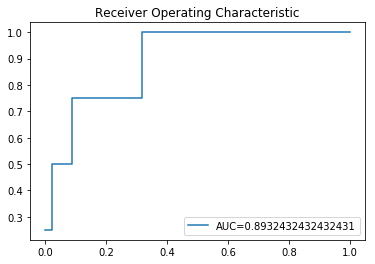

In [130]:
y_pred_prob = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()
